In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [63]:
df=pd.read_csv('real_time_cleaned.csv')

In [64]:
df = df.set_index('block_time')
df

,block_height,tx_count,mempool_size_mb,max_fee_rate,avg_fee_rate,median_fee_rate,fee_rate_10th,fee_rate_90th,fee_rate_std,difficulty,...,block_weight,block_version,block_interval,block_median_fee_rate,mempool_fee_histogram,bitcoin_price_usd,hist_low_fee_ratio,hist_med_fee_ratio,hist_high_fee_ratio,hist_fee_diversity
block_time,,,,,,,,,,,,,,,,,,,,,
2024-09-16 06:44:46,861523,59716.0,51.681340,354.36360,1.8891,2.0068,1.0166,2.0794,2.64506,9.267158e+13,...,3993295.0,689364992,451.0,2.1032,"[59691, 10, 7, 1, 2, 1, 1, 2, 0, 1]",58657.0,0.999581,0.000335,0.000084,0.888889
2024-09-16 07:01:15,861524,57979.0,50.830730,16.72375,1.7086,2.0039,1.0160,2.0714,0.47300,9.267158e+13,...,3993188.0,838860800,989.0,4.0000,"[57633, 317, 15, 7, 2, 2, 1, 1, 0, 1]",58657.0,0.994032,0.005881,0.000086,0.888889
2024-09-16 07:05:01,861525,53178.0,50.142707,25.11850,1.6743,2.0000,1.0157,2.0714,0.50320,9.267158e+13,...,3993640.0,551452672,226.0,2.0794,"[53136, 24, 8, 5, 1, 0, 1, 2, 0, 1]",58701.0,0.999210,0.000715,0.000075,0.777778
2024-09-16 07:34:53,861526,58865.0,51.178547,300.00000,1.7449,2.0068,1.0160,2.0794,1.33970,9.267158e+13,...,3993080.0,620822528,1393.2,4.8216,"[58864, 0, 0, 0, 0, 0, 0, 0, 0, 1]",58863.0,0.999977,0.000000,0.000017,0.111111
2024-09-16 07:35:35,861527,53746.0,50.270880,70.00000,1.6885,2.0000,1.0157,2.0714,0.69170,9.267158e+13,...,3992931.0,827326464,42.0,2.0952,"[53717, 14, 7, 3, 3, 1, 0, 0, 0, 1]",58863.0,0.999460,0.000502,0.000037,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-28 16:09:53,863238,63585.0,47.520951,69.58580,1.7067,1.7143,1.0352,1.8571,1.02140,8.840440e+13,...,3993751.9,1006632960,245.0,3.7381,"[63030, 542, 5, 1, 1, 2, 0, 2, 1, 1]",65622.0,0.991272,0.008634,0.000094,0.888889
2024-09-28 16:30:06,863239,66102.0,47.955642,100.00000,1.7618,1.7143,1.0377,2.0000,1.10120,8.840440e+13,...,3992898.0,619864064,1213.0,6.0000,"[66008, 79, 11, 1, 1, 0, 1, 0, 0, 1]",65689.0,0.998578,0.001392,0.000030,0.666667
2024-09-28 16:35:55,863240,64158.0,47.634346,219.73420,1.7141,1.7143,1.0352,1.9013,1.29700,8.840440e+13,...,3993166.0,569270272,349.0,3.6596,"[64154, 0, 2, 1, 0, 0, 0, 0, 0, 1]",65650.0,0.999938,0.000047,0.000016,0.333333


In [65]:
# Define features (X) and target (y)
X = df.drop(columns=['block_median_fee_rate','mempool_fee_histogram'])
y = df['block_median_fee_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
df.isnull().sum()

block_height             0
tx_count                 0
mempool_size_mb          0
max_fee_rate             0
avg_fee_rate             0
median_fee_rate          0
fee_rate_10th            0
fee_rate_90th            0
fee_rate_std             0
difficulty               0
hash_rate                0
mempool_min_fee          0
total_fee                0
mempool_usage            0
transaction_count        0
block_weight             0
block_version            0
block_interval           0
block_median_fee_rate    0
mempool_fee_histogram    0
bitcoin_price_usd        0
hist_low_fee_ratio       0
hist_med_fee_ratio       0
hist_high_fee_ratio      0
hist_fee_diversity       0
dtype: int64

In [14]:
# Store performance metrics for each model
results = {}

# 1. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, rf_y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_y_pred)),
    'R²': r2_score(y_test, rf_y_pred)
}

In [15]:
results

{'Random Forest': {'MAE': 0.44991933432835896,
  'RMSE': 0.6579311448681763,
  'R²': 0.8971645981621705}}

Normalize Features

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit Random Forest with scaled features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test_scaled)
results['Random Forest (Normalize Features)'] = {
    'MAE': mean_absolute_error(y_test, rf_y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_y_pred)),
    'R²': r2_score(y_test, rf_y_pred)
}

In [17]:
results

{'Random Forest': {'MAE': 0.44991933432835896,
  'RMSE': 0.6579311448681763,
  'R²': 0.8971645981621705},
 'Random Forest (Normalize Features)': {'MAE': 0.44747362626865733,
  'RMSE': 0.6532517886660199,
  'R²': 0.8986221739731199}}

In [18]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importances)[::-1]

for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

fee_rate_90th: 0.47759412055105704
transaction_count: 0.1533146991597264
block_interval: 0.12558702438710237
avg_fee_rate: 0.06689601647712688
block_height: 0.030548913233756882
tx_count: 0.02842445025029236
total_fee: 0.02592693114651922
bitcoin_price_usd: 0.019296626564308257
fee_rate_std: 0.010460435514239348
mempool_usage: 0.0070191366167810035
mempool_min_fee: 0.006402731412724976
block_version: 0.006182459098241176
block_weight: 0.005665469935563433
hash_rate: 0.005653400932556106
hist_med_fee_ratio: 0.005647130905840673
mempool_size_mb: 0.005564330294960895
hist_low_fee_ratio: 0.004979789262503653
hist_high_fee_ratio: 0.004558586822314152
fee_rate_10th: 0.0033291575103963043
median_fee_rate: 0.0026455651070399623
max_fee_rate: 0.002238843603548493
hist_fee_diversity: 0.0018318088796347083
difficulty: 0.00023237233376558866


In [27]:
# Define a subset of important features based on the feature importance results
important_features = [
    'fee_rate_90th',
    'transaction_count',
    'block_interval',
    'avg_fee_rate',
    'block_height',
    'tx_count',
    'total_fee',
    'bitcoin_price_usd',
    # 'fee_rate_std'
]

# Get the indices of important features from the original DataFrame
important_feature_indices = [X_train.columns.get_loc(col) for col in important_features]

# Use the indices to select important features from the scaled arrays
X_train_imp = X_train_scaled[:, important_feature_indices]
X_test_imp = X_test_scaled[:, important_feature_indices]


# Train the model with only important features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imp, y_train)
rf_y_pred = rf_model.predict(X_test_imp)

# Store the performance results for the Random Forest model
results['Random Forest (Important Features)'] = {
    'MAE': mean_absolute_error(y_test, rf_y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_y_pred)),
    'R²': r2_score(y_test, rf_y_pred)
}


In [28]:
results

{'Random Forest': {'MAE': 0.44991933432835896,
  'RMSE': 0.6579311448681763,
  'R²': 0.8971645981621705},
 'Random Forest (Normalize Features)': {'MAE': 0.44747362626865733,
  'RMSE': 0.6532517886660199,
  'R²': 0.8986221739731199},
 'Random Forest (Important Features)': {'MAE': 0.4327837492537321,
  'RMSE': 0.6361300598377173,
  'R²': 0.9038667565194023}}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with error_score='raise' to catch any errors during search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, error_score='raise')





In [36]:
# Fit the random search model
rf_random.fit(X_train_imp, y_train)




Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, verbose=2)

In [37]:
# Get the best parameters
best_params = rf_random.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
best_rf_model = rf_random.best_estimator_
rf_y_pred_best = best_rf_model.predict(X_test_imp)


results['Random Forest (Tuned)'] = {
    'MAE': mean_absolute_error(y_test, rf_y_pred_best),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_y_pred_best)),
    'R²': r2_score(y_test, rf_y_pred_best)
}

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [38]:
results

{'Random Forest': {'MAE': 0.44991933432835896,
  'RMSE': 0.6579311448681763,
  'R²': 0.8971645981621705},
 'Random Forest (Normalize Features)': {'MAE': 0.44747362626865733,
  'RMSE': 0.6532517886660199,
  'R²': 0.8986221739731199},
 'Random Forest (Important Features)': {'MAE': 0.4327837492537321,
  'RMSE': 0.6361300598377173,
  'R²': 0.9038667565194023},
 'Random Forest (Tuned)': {'MAE': 0.4179498158805978,
  'RMSE': 0.6126997909981378,
  'R²': 0.9108179968129153}}

In [39]:
df.columns

Index(['block_height', 'tx_count', 'mempool_size_mb', 'max_fee_rate',
       'avg_fee_rate', 'median_fee_rate', 'fee_rate_10th', 'fee_rate_90th',
       'fee_rate_std', 'difficulty', 'hash_rate', 'mempool_min_fee',
       'total_fee', 'mempool_usage', 'transaction_count', 'block_weight',
       'block_version', 'block_interval', 'block_median_fee_rate',
       'mempool_fee_histogram', 'bitcoin_price_usd', 'hist_low_fee_ratio',
       'hist_med_fee_ratio', 'hist_high_fee_ratio', 'hist_fee_diversity'],
      dtype='object')

In [40]:
X_train.shape

(1340, 23)

In [41]:
X_test.shape

(335, 23)

Best Model:

Random Forest Model Performance (Optimized):
Mean Absolute Error: 0.4246677074626874
Root Mean Squared Error: 0.6183591144936392
R² Score: 0.9091628934826346

Feature Importance:
             feature  importance
0      fee_rate_90th    0.228340
3       avg_fee_rate    0.184995
2     block_interval    0.144084
6          total_fee    0.133558
1  transaction_count    0.108822
7  bitcoin_price_usd    0.057312
4       block_height    0.053483
8       fee_rate_std    0.046346
5           tx_count    0.043059


<Figure size 1000x600 with 0 Axes>

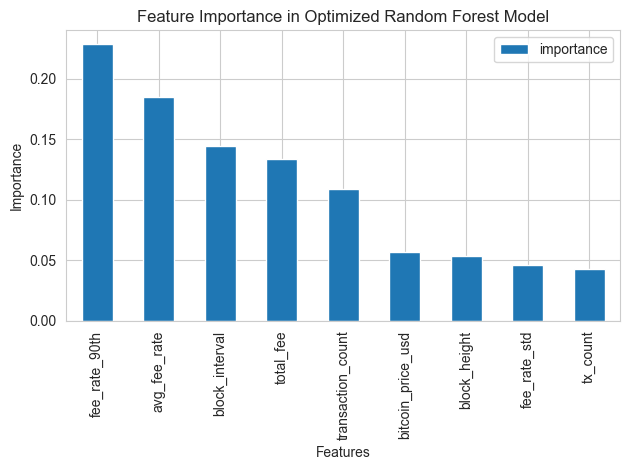

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df=pd.read_csv('real_time_cleaned.csv')
df = df.set_index('block_time')
# Define features (X) and target (y)
X = df.drop(columns=['block_median_fee_rate','mempool_fee_histogram'])
y = df['block_median_fee_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define important features
important_features = [
    'fee_rate_90th',
    'transaction_count',
    'block_interval',
    'avg_fee_rate',
    'block_height',
    'tx_count',
    'total_fee',
    'bitcoin_price_usd',
    'fee_rate_std' 
]

# Get the indices of important features
important_feature_indices = [X_train.columns.get_loc(col) for col in important_features]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select important features from scaled arrays
X_train_imp = X_train_scaled[:, important_feature_indices]
X_test_imp = X_test_scaled[:, important_feature_indices]

# Define the Random Forest model with best parameters
rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42
)

# Train the model
rf_model.fit(X_train_imp, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_imp)

# Calculate performance metrics
mae = mean_absolute_error(y_test, rf_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
r2 = r2_score(y_test, rf_y_pred)


results = {}
results['Random Forest (Optimized)'] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2
}

print("Random Forest Model Performance (Optimized):")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Feature importance for the optimized model
feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(x='feature', y='importance', kind='bar')
plt.title('Feature Importance in Optimized Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()